In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.utils import resample


import pickle


# Load your dataset (example: a CSV with 'Overall_Clearance' and 'Grade_Submission' columns)
data = pd.read_csv('clearance_dataset.csv')

# Ensure 'Overall_Clearance' column has meaningful text and no NaN values
data['Overall_Clearance'] = data['Overall_Clearance'].fillna('').astype(str)

# Display dataset head
print(data.head())

# Display value counts for 'Overall_Clearance'
print(data['Overall_Clearance'].value_counts())

# Split data into training and test sets
X = data['Overall_Clearance']
y = data['Grade_Submission']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for empty documents and print a warning if any are found
if (X_train == '').sum() > 0:
    print("Warning: Some documents are empty after cleaning!")

# Convert documents to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

try:
    # Transform text data into TF-IDF features
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    print("TF-IDF transformation successful.")
except ValueError as e:
    print(f"Error during TF-IDF transformation: {e}")
    X_train_tfidf, X_test_tfidf = None, None  # Set them to None to avoid proceeding with invalid data

# Proceed only if TF-IDF transformation was successful
if X_train_tfidf is not None:
    # Train a classifier
    classifier = RandomForestClassifier()
    classifier.fit(X_train_tfidf, y_train)

    # Save the model and vectorizer for later use in the Flask app
    joblib.dump(classifier, 'document_classifier.pkl')
    joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save the classifier and vectorizer using pickle
    pickle.dump(rf_classifier, open('document_classifier.pkl', 'wb'))
    pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))


    # Evaluate the model (optional)
    accuracy = classifier.score(X_test_tfidf, y_test)
    print(f'Model accuracy: {accuracy * 100:.2f}%')
else:
    print("TF-IDF transformation failed. Cannot proceed with training.")


   Faculty_ID  Admin_Clearance  Research_Clearance  Grade_Submission  \
0           1                0                   0                 1   
1           2                1                   0                 0   
2           3                0                   0                 0   
3           4                0                   1                 0   
4           5                0                   0                 0   

   Library_Clearance  Equipment_Returned Overall_Clearance  
0                  0                   0                 0  
1                  1                   1                 0  
2                  1                   1                 0  
3                  0                   1                 0  
4                  0                   1                 0  
Overall_Clearance
0    487
1     13
Name: count, dtype: int64
Error during TF-IDF transformation: empty vocabulary; perhaps the documents only contain stop words
TF-IDF transformation failed. Cannot pr

## Exploratory Data Analysis

In [8]:
## Balanced DAta Set

In [9]:
from sklearn.utils import resample

# Define the maximum count among all categories
max_count = data['Overall_Clearance'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in data['Overall_Clearance'].unique():
    category_data = data['Overall_Clearance'] == category
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [10]:
# balanced_df.isnull().sum()
balanced_df.dropna(inplace=True)

In [11]:
##TRAIN RANDOM forest CLASSIFIER

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load your dataset
data = pd.read_csv('clearance_dataset.csv')

# Display the DataFrame columns and check for NaN values
print("Columns in the DataFrame:", data.columns)
print("Checking for NaN values:")
print(data.isnull().sum())

# Drop rows with NaN values in 'Overall_Clearance' or 'Grade_Submission'
data = data.dropna(subset=['Overall_Clearance', 'Grade_Submission'])

# Split data into features and target
X = data['Overall_Clearance'].astype(str)  # Convert to string
y = data['Grade_Submission']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for empty documents
X_train = X_train[X_train.str.strip() != '']  # Remove empty strings
y_train = y_train[X_train.index]  # Align target with cleaned features

# Check contents of X_train
print("Contents of X_train:")
print(X_train)

# Option 1: Custom Stop Words (Example)
custom_stop_words = ['submit', 'faculty', 'clearance']  # Add any domain-specific terms
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, max_features=1000)

# Option 2: Remove Stop Words Temporarily
# vectorizer = TfidfVectorizer(stop_words=None, max_features=1000)

# Convert documents to TF-IDF features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Save the model and vectorizer for later use in the Flask app
joblib.dump(rf_classifier, 'document_classifier.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Evaluate the model (optional)
accuracy = rf_classifier.score(X_test_tfidf, y_test)
print(f'Model accuracy: {accuracy * 100:.2f}%')


Columns in the DataFrame: Index(['Faculty_ID', 'Admin_Clearance', 'Research_Clearance',
       'Grade_Submission', 'Library_Clearance', 'Equipment_Returned',
       'Overall_Clearance'],
      dtype='object')

Checking for NaN values:
Faculty_ID            0
Admin_Clearance       0
Research_Clearance    0
Grade_Submission      0
Library_Clearance     0
Equipment_Returned    0
Overall_Clearance     0
dtype: int64

Unique values in Faculty_ID:
Faculty_ID
500    1
1      1
2      1
3      1
484    1
      ..
9      1
8      1
7      1
6      1
5      1
Name: count, Length: 500, dtype: int64

Sample of Faculty_ID:
0    1
1    2
2    3
3    4
4    5
Name: Faculty_ID, dtype: int64

Unique values in Admin_Clearance:
Admin_Clearance
1    256
0    244
Name: count, dtype: int64

Sample of Admin_Clearance:
0    0
1    1
2    0
3    0
4    0
Name: Admin_Clearance, dtype: int64

Unique values in Research_Clearance:
Research_Clearance
1    254
0    246
Name: count, dtype: int64

Sample of Research_C

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
# Load Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

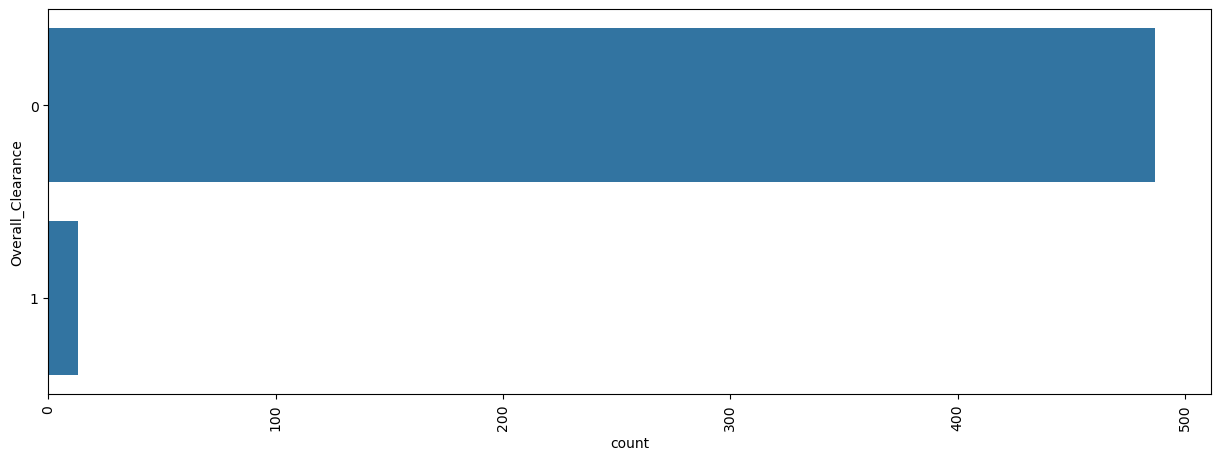

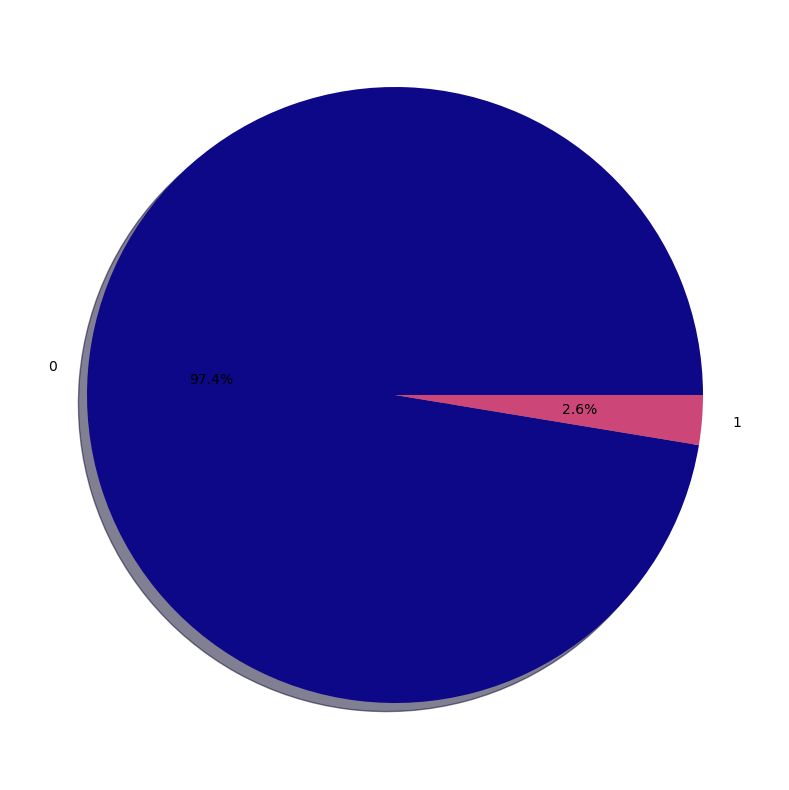

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data['Overall_Clearance'])
plt.xticks(rotation=90)
plt.show()


counts = data['Overall_Clearance'].value_counts()
labels = data['Overall_Clearance'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()